In [1]:
import numpy as np
import os
from oe_acute import trial_utils as tu
from oe_acute import MNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pickle
import tqdm
import glob

import sys
from oe_acute import pyMNE

In [2]:
os.nice(1)

2

### Load dsets

In [3]:
stim_spec = np.load('/mnt/cube/srrudrar/temporal_model/stim_resp_256/enc_train_256.npy')
stim_resp = np.load('/mnt/cube/srrudrar/temporal_model/stim_resp_256/resp_train_256.npy')

In [4]:
np.shape(stim_spec), np.shape(stim_resp)

((48855, 256), (48855, 214, 16))

In [5]:
def prepare_MNE_dset(stim_spec, stim_resp, nsegbins=16, concat=True):
    '''
    Create the dataset for fitting MNE model
    '''
    stim_mne = []
    resp_mne = []
    for s, r in zip(stim_spec, stim_resp):
        #nfreq, ntime = s.shape
        #s_segs = np.stack([s[:, n:(n+nsegbins)] for n in range(ntime - nsegbins)], axis=0)
        s_segs = s
        r_segs = np.sum(r, axis=1)
        stim_mne.append(s_segs)
        resp_mne.append(r_segs)
    if concat:
        return np.vstack(stim_mne), np.vstack(resp_mne)
    else:
        return stim_mne, resp_mne

In [6]:
nsegbins = 16

In [7]:
stim_mne = []
resp_mne = []
stim_mne, resp_mne = prepare_MNE_dset(stim_spec, stim_resp, nsegbins=nsegbins)

In [8]:
np.shape(stim_mne), np.shape(resp_mne)

((48855, 256), (48855, 214))

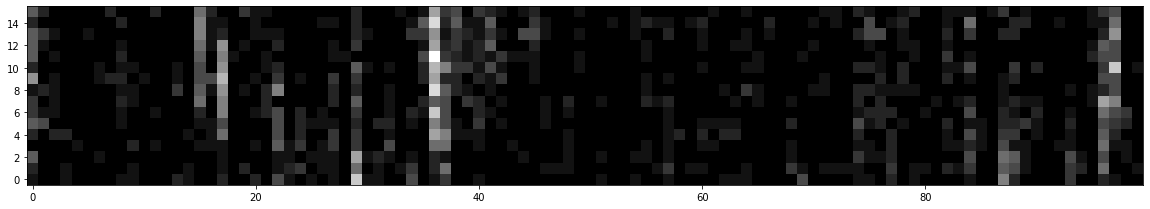

In [9]:
ax = plt.subplots(figsize=(20,8))
plt.imshow(np.transpose(stim_resp[:100, 100, :]), origin='lower', cmap='gray')

### Split into train test sets

In [10]:
len_units = np.shape(resp_mne)[1]

In [11]:
units_to_process = list(np.load('/mnt/cube/srrudrar/temporal_model/units_to_process.npy'))

In [12]:
exp_path = '/mnt/cube/srrudrar/temporal_model/stim_resp_256/'

In [13]:
# obtain all preprocessed datas

%matplotlib inline
sdim = 256
n_jackknives = 4

test_output_path = os.path.join(exp_path, 'MNE_test_dset/no_norm')
os.makedirs(test_output_path, exist_ok=True)
n_eigvec_to_display = 6 # Number of most positive and most negative eigenvectors to display

pfinals = {}
for unit in units_to_process[:20]:
    i = units_to_process.index(unit)
    stims_train, resps_train, stims_test, resps_test = MNE.prepare_MNE_train_test_set(stim_mne, resp_mne[:,i][:,np.newaxis], train_pct=0.8, zscore=False, kz_norm_resp=False)
    
    # Save test dataset
    test_dict = {'stims_test':stims_test, 'resps_test':resps_test}
    out_fname = 'unit-{}_MNE.pkl'.format(unit)
    out_f = os.path.join(test_output_path, out_fname)
    with open(out_f, 'wb') as f:
        pickle.dump(test_dict, f)

    # Run MNE
    pfinal = MNE.fit_MNE(stims_train, resps_train, order=2)
    #MNE.plot_MNE(pfinal, unit, figure_output_path)
    pfinals[unit] = pfinal

Iters   tally   ll(test) 
    1       0    0.121703
    2       0    0.117431
    3       0    0.116718
    4       0    0.114664
    5       0    0.113764
    6       0    0.113037
    7       0    0.111802
    8       0    0.110997
    9       0    0.110783
   10       0    0.109260
   11       0    0.108992
   12       0    0.107677
   13       0    0.106821
   14       0    0.106583
   15       0    0.106132
   16       0    0.105972
   17       0    0.104898
   18       0    0.104823
   19       0    0.104593
   20       0    0.104315
   21       0    0.103488
   22       0    0.103358
   23       0    0.102601
   24       0    0.102383
   25       0    0.101647
   26       0    0.101395
   27       0    0.101094
   28       0    0.100704
   29       0    0.100673
   30       0    0.100266
   31       0    0.100230
   32       0    0.099995
   33       0    0.099959
   34       0    0.099790
   35       0    0.099800
   36       1    0.099632
   37       0    0.099690
   38       

  167       0    0.088302
  168       1    0.088581
  169       2    0.089161
  170       3    0.089353
  171       4    0.089840
  172       5    0.089756
  173       6    0.089031
  174       7    0.088667
  175       8    0.087468
  176       0    0.087203
  177       0    0.086938
  178       0    0.086933
  179       0    0.086859
  180       0    0.086807
  181       0    0.086745
  182       0    0.086740
  183       0    0.086705
  184       0    0.086688
  185       0    0.086673
  186       0    0.086704
  187       1    0.086689
  188       2    0.086680
  189       3    0.086660
  190       0    0.086631
  191       0    0.086614
  192       0    0.086631
  193       1    0.086627
  194       2    0.086675
  195       3    0.086659
  196       4    0.086598
  197       0    0.086563
  198       0    0.086547
  199       0    0.086521
  200       0    0.086535
         Current function value: 0.072755
         Iterations: 200
         Function evaluations: 351
         Gradi

   77       0    0.087218
   78       1    0.087119
   79       0    0.087096
   80       0    0.086924
   81       0    0.086821
   82       0    0.086757
   83       0    0.086789
   84       1    0.086797
   85       2    0.086675
   86       0    0.086436
   87       0    0.086272
   88       0    0.086248
   89       0    0.086198
   90       0    0.086066
   91       0    0.086028
   92       0    0.085931
   93       0    0.085904
   94       0    0.085836
   95       0    0.085872
   96       1    0.085937
   97       2    0.085637
   98       0    0.085480
   99       0    0.085467
  100       0    0.085448
  101       0    0.085422
  102       0    0.085338
  103       0    0.085270
  104       0    0.085243
  105       0    0.085246
  106       1    0.085246
  107       2    0.085223
  108       0    0.085234
  109       1    0.085232
  110       2    0.085131
  111       0    0.085128
  112       0    0.085131
  113       1    0.085076
  114       0    0.084933
  115       

   46       0    0.085916
   47       0    0.085829
   48       0    0.085785
   49       0    0.085664
   50       0    0.085628
   51       0    0.085482
   52       0    0.085423
   53       0    0.085151
   54       0    0.085023
   55       0    0.084843
   56       0    0.084805
   57       0    0.084766
   58       0    0.084729
   59       0    0.084684
   60       0    0.084617
   61       0    0.084581
   62       0    0.084492
   63       0    0.084454
   64       0    0.084300
   65       0    0.084108
   66       0    0.084023
   67       0    0.084066
   68       1    0.083905
   69       0    0.083639
   70       0    0.083437
   71       0    0.083393
   72       0    0.083429
   73       1    0.083336
   74       0    0.083304
   75       0    0.083242
   76       0    0.083140
   77       0    0.083072
   78       0    0.083008
   79       0    0.082959
   80       0    0.082928
   81       0    0.082894
   82       0    0.082880
   83       0    0.082850
   84       

  153       1    0.081062
  154       2    0.081026
  155       3    0.080980
  156       0    0.080944
  157       0    0.080961
  158       1    0.080923
  159       0    0.080906
  160       0    0.080895
  161       0    0.080729
  162       0    0.080719
  163       0    0.080711
  164       0    0.080728
  165       1    0.080713
  166       2    0.080736
  167       3    0.080777
  168       4    0.080799
  169       5    0.080769
  170       6    0.080718
  171       7    0.080662
  172       0    0.080661
  173       0    0.080684
  174       1    0.080676
  175       2    0.080654
  176       0    0.080620
  177       0    0.080609
  178       0    0.080590
  179       0    0.080579
  180       0    0.080558
  181       0    0.080572
  182       1    0.080575
  183       2    0.080510
  184       0    0.080498
  185       0    0.080545
  186       1    0.080554
  187       2    0.080529
  188       3    0.080522
  189       4    0.080513
  190       5    0.080537
  191       

   64       1   -0.101101
   65       2   -0.116818
   66       0   -0.123923
   67       0   -0.133568
   68       0   -0.139026
   69       0   -0.134317
   70       1   -0.140272
   71       0   -0.138202
   72       1   -0.147947
   73       0   -0.155293
   74       0   -0.153034
   75       1   -0.160205
   76       0   -0.153652
   77       1   -0.162714
   78       0   -0.168242
   79       0   -0.185929
   80       0   -0.184490
   81       1   -0.188857
   82       0   -0.182543
   83       1   -0.187024
   84       2   -0.187248
   85       3   -0.196294
   86       0   -0.195477
   87       1   -0.209599
   88       0   -0.202501
   89       1   -0.209806
   90       0   -0.217568
   91       0   -0.208526
   92       1   -0.208164
   93       2   -0.217173
   94       3   -0.219036
   95       0   -0.225335
   96       0   -0.220537
   97       1   -0.224963
   98       2   -0.218196
   99       3   -0.227830
  100       0   -0.226793
  101       1   -0.226176
  102       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/temp

         Current function value: -1.477031
         Iterations: 159
         Function evaluations: 391
         Gradient evaluations: 379
Iters   tally   ll(test) 
    1       0    0.297156
    2       0    0.289502
    3       0    0.286851
    4       0    0.281840
    5       0    0.273849
    6       0    0.271571
    7       0    0.268533
    8       0    0.259036
    9       0    0.254553
   10       0    0.253652
   11       0    0.252638
   12       0    0.251007
   13       0    0.248883
   14       0    0.248619
   15       0    0.247757
   16       0    0.241152
   17       0    0.238402
   18       0    0.234412
   19       0    0.235117
   20       1    0.215866
   21       0    0.210603
   22       0    0.206934
   23       0    0.205251
   24       0    0.200255
   25       0    0.199262
   26       0    0.190328
   27       0    0.188284
   28       0    0.187706
   29       0    0.182753
   30       0    0.182196
   31       0    0.182805
   32       1    0.181454
   3

   99       0   -0.038489
  100       0   -0.029798
  101       1   -0.000654


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/temp

         Current function value: -0.269984
         Iterations: 101
         Function evaluations: 288
         Gradient evaluations: 276
Iters   tally   ll(test) 
    1       0    0.297454
    2       0    0.289298
    3       0    0.287023
    4       0    0.280822
    5       0    0.279210
    6       0    0.274404
    7       0    0.265777
    8       0    0.261344
    9       0    0.256697
   10       0    0.252994
   11       0    0.252077
   12       0    0.249572
   13       0    0.247719
   14       0    0.245722
   15       0    0.241814
   16       0    0.235162
   17       0    0.232052
   18       0    0.225177
   19       0    0.220598
   20       0    0.218041
   21       0    0.215341
   22       0    0.214046
   23       0    0.211449
   24       0    0.210606
   25       0    0.209816
   26       0    0.208162
   27       0    0.207835
   28       0    0.204842
   29       0    0.201025
   30       0    0.193623
   31       0    0.190833
   32       0    0.190016
   3

   99       0    0.139301
  100       0    0.139345
  101       1    0.138907
  102       0    0.137864
  103       0    0.137992
  104       1    0.137371
  105       0    0.136186
  106       0    0.136133
  107       0    0.135375
  108       0    0.134640
  109       0    0.134067
  110       0    0.133008
  111       0    0.132176
  112       0    0.132266
  113       1    0.132269
  114       2    0.131874
  115       0    0.131019
  116       0    0.130602
  117       0    0.130812
  118       1    0.130515
  119       0    0.130470
  120       0    0.129513
  121       0    0.128345
  122       0    0.127324
  123       0    0.126984
  124       0    0.126242
  125       0    0.126345
  126       1    0.126101
  127       0    0.125727
  128       0    0.125813
  129       1    0.125567
  130       0    0.125169
  131       0    0.124852
  132       0    0.125189
  133       1    0.125349
  134       2    0.124838
  135       0    0.124674
  136       0    0.124420
  137       

   44       0    0.197951
   45       0    0.196440
   46       0    0.195339
   47       0    0.194109
   48       0    0.193406
   49       0    0.193179
   50       0    0.192605
   51       0    0.192101
   52       0    0.192012
   53       0    0.191742
   54       0    0.191478
   55       0    0.191143
   56       0    0.190911
   57       0    0.189969
   58       0    0.189274
   59       0    0.189202
   60       0    0.188009
   61       0    0.187502
   62       0    0.183880
   63       0    0.182615
   64       0    0.180884
   65       0    0.178640
   66       0    0.175677
   67       0    0.175400
   68       0    0.174655
   69       0    0.174297
   70       0    0.173663
   71       0    0.172973
   72       0    0.172894
   73       0    0.172518
   74       0    0.172252
   75       0    0.172119
   76       0    0.171337
   77       0    0.171382
   78       1    0.171182
   79       0    0.171054
   80       0    0.169959
   81       0    0.169614
   82       

  164       2    0.127452
  165       0    0.127752
  166       1    0.127718
  167       2    0.127425
  168       0    0.127721
  169       1    0.127043
  170       0    0.127161
  171       1    0.126530
  172       0    0.126854
  173       1    0.126524
  174       0    0.127955
  175       1    0.128041
  176       2    0.124424
  177       0    0.124207
  178       0    0.124187
  179       0    0.124165
  180       0    0.124353
  181       1    0.124103
  182       0    0.124402
  183       1    0.126955
  184       2    0.126616
  185       3    0.128312
  186       4    0.127940
  187       5    0.128214
  188       6    0.123544
  189       0    0.121520
  190       0    0.120106
  191       0    0.118631
  192       0    0.118815
  193       1    0.116092
  194       0    0.114822
  195       0    0.113382
  196       0    0.113903
  197       1    0.113086
  198       0    0.111646
  199       0    0.111947
  200       1    0.111726
         Current function value: 0.008

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


   39       2   -inf


/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret 

   40       0    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


   41       1    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


   42       2    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


   43       3    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


   44       4    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


   45       5    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


   46       6    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


   47       7    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


   48       8    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


   49       9    nan
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.449482
    2       0    0.427908
    3       0    0.420361
    4       0    0.411793
    5       0    0.405667
    6       0    0.404651
    7       0    0.402936
    8       0    0.401630
    9       0    0.398326
   10       0    0.392485
   11       0    0.390185
   12       0    0.378751
   13       0    0.377790
   14       0    0.375090
   15       0    0.366257
   16       0    0.360531
   17       0    0.357915
   18       0    0.356129
   19       0    0.356327
   20       1    0.355691
   21       0    0.354029
   22       0    0.351742
   23       0    0.340514
   24       0    0.334931
   25       0    0.325063
   26       0    0.324729
   27       0    0.301289
   28       0    0.289047
   29       0    0.284674
   30       0    0.265262
   31       0    0.263661
   32       0    0.258111
   33       0    0.255385
   34       0    0.253627
   35       0    0.245513
   36       0    

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temp

  167       0    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


  168       1    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temp

  169       2    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_metho

  170       3    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWar

  171       4    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWar

  172       5    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWar

  173       6    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWar

  174       7    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWar

  175       8    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWar

  176       9    nan
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.448148
    2       0    0.423620
    3       0    0.418022
    4       0    0.399607
    5       0    0.396186
    6       0    0.390293
    7       0    0.386923
    8       0    0.383054
    9       0    0.378428
   10       0    0.373971
   11       0    0.369897
   12       0    0.365373
   13       0    0.361985
   14       0    0.361523
   15       0    0.358517
   16       0    0.357769
   17       0    0.356050
   18       0    0.355096
   19       0    0.353944
   20       0    0.346902
   21       0    0.340907
   22       0    0.338443
   23       0    0.324666
   24       0    0.319110
   25       0    0.303806
   26       0    0.291720
   27       0    0.288533
   28       0    0.285063
   29       0    0.283948
   30       0    0.282046
   31       0    0.278040
   32       0    0.277293
   33       0    0.270541
   34       0    0.269388
   35       0    0.266441
   36       0    

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temp

   97       3    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temp

   98       4    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temp

   99       5    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temp

  100       6    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temp

  101       7    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temp

  102       8    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temp

  103       9    nan
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.446571
    2       0    0.426737
    3       0    0.421520
    4       0    0.412905
    5       0    0.407175
    6       0    0.406803
    7       0    0.404497
    8       0    0.400896
    9       0    0.398770
   10       0    0.394471
   11       0    0.369808
   12       0    0.361775
   13       0    0.359660
   14       0    0.355529
   15       0    0.346905
   16       0    0.341851
   17       0    0.328637
   18       0    0.317225
   19       0    0.314281
   20       0    0.305374
   21       0    0.302488
   22       0    0.295908
   23       0    0.288530
   24       0    0.287503
   25       0    0.283987
   26       0    0.280829
   27       0    0.280259
   28       0    0.277257
   29       0    0.272329
   30       0    0.270328
   31       0    0.269656
   32       0    0.263472
   33       0    0.259279
   34       0    0.250968
   35       0    0.242998
   36       0    

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


  123       1   -inf
  124       0   -inf


/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/scipy/optimize/linesearch.py:156: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)


  125       1   -inf


/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


  126       2   -inf
  127       3   -inf


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


  128       4   -inf


/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


  129       5   -inf


/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


  130       6   -inf


/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


  131       7   -inf


/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


  132       8   -inf


/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


  133       9   -inf
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.060519
    2       0    0.058718
    3       0    0.057565
    4       0    0.057364
    5       0    0.057369
    6       1    0.056348
    7       0    0.056154
    8       0    0.055349
    9       0    0.055264
   10       0    0.054873
   11       0    0.054699
   12       0    0.054383
   13       0    0.054117
   14       0    0.053851
   15       0    0.053591
   16       0    0.052772
   17       0    0.052311
   18       0    0.052172
   19       0    0.052170
   20       0    0.052102
   21       0    0.051936
   22       0    0.051859
   23       0    0.051566
   24       0    0.051294
   25       0    0.050869
   26       0    0.050597
   27       0    0.050416
   28       0    0.050395
   29       0    0.050390
   30       0    0.050389
   31       0    0.050265
   32       0    0.050139
   33       0    0.049879
   34       0    0.049855
   35       0    0.049766
   36       0    

  153       6    0.044010
  154       7    0.043982
  155       0    0.043972
  156       0    0.043981
  157       1    0.043955
  158       0    0.043971
  159       1    0.043976
  160       2    0.044007
  161       3    0.044021
  162       4    0.043970
  163       5    0.043894
  164       0    0.043870
  165       0    0.043882
  166       1    0.043886
  167       2    0.043872
  168       3    0.043847
  169       0    0.043854
  170       1    0.043857
  171       2    0.043839
  172       0    0.043810
  173       0    0.043822
  174       1    0.043852
  175       2    0.043817
  176       3    0.043772
  177       0    0.043776
  178       1    0.043788
  179       2    0.043773
  180       3    0.043742
  181       0    0.043753
  182       1    0.043783
  183       2    0.043764
  184       3    0.043751
  185       4    0.043773
  186       5    0.043787
  187       6    0.043761
  188       7    0.043656
  189       0    0.043660
  190       1    0.043678
  191       

  123       4    0.044921
  124       0    0.044876
  125       0    0.044948
  126       1    0.044904
  127       2    0.044875
  128       0    0.044877
  129       1    0.044922
  130       2    0.044988
  131       3    0.044955
  132       4    0.044846
  133       0    0.044890
  134       1    0.044923
  135       2    0.044922
  136       3    0.044963
  137       4    0.044909
  138       5    0.044938
  139       6    0.044893
  140       7    0.044960
  141       8    0.044986
  142       9    0.044912
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.186051
    2       0    0.180082
    3       0    0.178799
    4       0    0.173886
    5       0    0.171283
    6       0    0.168632
    7       0    0.166747
    8       0    0.165893
    9       0    0.163239
   10       0    0.162237
   11       0    0.158871
   12       0    0.156024
   13       0    0.155109
   14       0    0.151563
   15       0    0.150309
   16       0    0.148663
   17       

   86       0    0.126178
   87       0    0.127249
   88       1    0.127864
   89       2    0.126976
   90       3    0.126047
   91       0    0.126240
   92       1    0.126939
   93       2    0.126089
   94       3    0.126028
   95       0    0.127062
   96       1    0.126419
   97       2    0.124825
   98       0    0.125859
   99       1    0.125969
  100       2    0.124911
  101       3    0.121368
  102       0    0.120253
  103       0    0.122014
  104       1    0.124129
  105       2    0.128821
  106       3    0.130578
  107       4    0.132432
  108       5    0.135191
  109       6    0.137110
  110       7    0.126626
  111       8    0.123454
  112       9    0.124960
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.180611
    2       0    0.174755
    3       0    0.173284
    4       0    0.170021
    5       0    0.167602
    6       0    0.165093
    7       0    0.161623
    8       0    0.160019
    9       0    0.156378
   10       

  118       2    0.052384
  119       3    0.052238
  120       4    0.050011
  121       0    0.050451
  122       1    0.050272
  123       2    0.047446
  124       0    0.047523
  125       1    0.046692
  126       0    0.045994
  127       0    0.046350
  128       1    0.044613
  129       0    0.044957
  130       1    0.043502
  131       0    0.044236
  132       1    0.043550
  133       2    0.043864
  134       3    0.043843
  135       4    0.041828
  136       0    0.041063
  137       0    0.041619
  138       1    0.041093
  139       2    0.040343
  140       0    0.039824
  141       0    0.039496
  142       0    0.038357
  143       0    0.037809
  144       0    0.038971
  145       1    0.038908
  146       2    0.037894
  147       3    0.038327
  148       4    0.038518
  149       5    0.037527
  150       0    0.035783
  151       0    0.035807
  152       1    0.035040
  153       0    0.034804
  154       0    0.034160
  155       0    0.034341
  156       

   17       0    0.186214
   18       0    0.185021
   19       0    0.184205
   20       0    0.183777
   21       0    0.181868
   22       0    0.181438
   23       0    0.181105
   24       0    0.180141
   25       0    0.179742
   26       0    0.179313
   27       0    0.179130
   28       0    0.178089
   29       0    0.177250
   30       0    0.174566
   31       0    0.174156
   32       0    0.171660
   33       0    0.169698
   34       0    0.168086
   35       0    0.165457
   36       0    0.165042
   37       0    0.163631
   38       0    0.163134
   39       0    0.162289
   40       0    0.162191
   41       0    0.161915
   42       0    0.160603
   43       0    0.160350
   44       0    0.160205
   45       0    0.160344
   46       1    0.160473
   47       2    0.159893
   48       0    0.159488
   49       0    0.158945
   50       0    0.158952
   51       1    0.158976
   52       2    0.158916
   53       0    0.158686
   54       0    0.157100
   55       

  124       0    0.136155
  125       1    0.136072
  126       2    0.136241
  127       3    0.136091
  128       4    0.136242
  129       5    0.135997
  130       0    0.136458
  131       1    0.136324
  132       2    0.136132
  133       3    0.135481
  134       0    0.135552
  135       1    0.134593
  136       0    0.134143
  137       0    0.134197
  138       1    0.134419
  139       2    0.134291
  140       3    0.134314
  141       4    0.133843
  142       0    0.133977
  143       1    0.133912
  144       2    0.134090
  145       3    0.133913
  146       4    0.134438
  147       5    0.134374
  148       6    0.133760
  149       0    0.135484
  150       1    0.136747
  151       2    0.137836
  152       3    0.137176
  153       4    0.133413
  154       0    0.133928
  155       1    0.132735
  156       0    0.130592
  157       0    0.128623
  158       0    0.129941
  159       1    0.129273
  160       2    0.126686
  161       0    0.126248
  162       

   59       0    0.169351
   60       0    0.168801
   61       0    0.168793
   62       0    0.167654
   63       0    0.166670
   64       0    0.166222
   65       0    0.165606
   66       0    0.164924
   67       0    0.164101
   68       0    0.164064
   69       0    0.163173
   70       0    0.162920
   71       0    0.162422
   72       0    0.161945
   73       0    0.161809
   74       0    0.161809
   75       0    0.161498
   76       0    0.161406
   77       0    0.161220
   78       0    0.161073
   79       0    0.160896
   80       0    0.160750
   81       0    0.160343
   82       0    0.160101
   83       0    0.159719
   84       0    0.159478
   85       0    0.159133
   86       0    0.159165
   87       1    0.158912
   88       0    0.158322
   89       0    0.158201
   90       0    0.157906
   91       0    0.157943
   92       1    0.157826
   93       0    0.157735
   94       0    0.157664
   95       0    0.157470
   96       0    0.157449
   97       

  166       0    0.154017
  167       0    0.153985
  168       0    0.153980
  169       0    0.153996
  170       1    0.153981
  171       2    0.153940
  172       0    0.153875
  173       0    0.153869
  174       0    0.153835
  175       0    0.153850
  176       1    0.153866
  177       2    0.153757
  178       0    0.153691
  179       0    0.153712
  180       1    0.153725
  181       2    0.153576
  182       0    0.153405
  183       0    0.153351
  184       0    0.153265
  185       0    0.153269
  186       1    0.153224
  187       0    0.153225
  188       1    0.153263
  189       2    0.153297
  190       3    0.153268
  191       4    0.153248
  192       5    0.153275
  193       6    0.153251
  194       7    0.153323
  195       8    0.153323
  196       9    0.153237
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.223798
    2       0    0.221193
    3       0    0.217973
    4       0    0.217254
    5       0    0.211473
    6       

   75       0    0.156888
   76       0    0.156184
   77       0    0.155470
   78       0    0.155303
   79       0    0.154893
   80       0    0.154902
   81       1    0.154968
   82       2    0.154875
   83       0    0.154723
   84       0    0.154650
   85       0    0.154436
   86       0    0.154340
   87       0    0.154204
   88       0    0.154069
   89       0    0.154083
   90       1    0.153783
   91       0    0.153865
   92       1    0.153847
   93       2    0.153739
   94       0    0.153769
   95       1    0.153336
   96       0    0.153208
   97       0    0.153219
   98       1    0.153149
   99       0    0.152927
  100       0    0.152944
  101       1    0.152835
  102       0    0.152788
  103       0    0.152572
  104       0    0.152387
  105       0    0.152438
  106       1    0.152460
  107       2    0.152334
  108       0    0.152305
  109       0    0.152396
  110       1    0.152289
  111       0    0.152168
  112       0    0.152154
  113       

  182       1    0.100883
  183       0    0.100846
  184       0    0.100831
  185       0    0.100837
  186       1    0.100845
  187       2    0.100857
  188       3    0.100854
  189       4    0.100875
  190       5    0.100873
  191       6    0.100883
  192       7    0.100867
  193       8    0.100854
  194       9    0.100841
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.127198
    2       0    0.125586
    3       0    0.124886
    4       0    0.123034
    5       0    0.122801
    6       0    0.121761
    7       0    0.121862
    8       1    0.121676
    9       0    0.120689
   10       0    0.119707
   11       0    0.119480
   12       0    0.119426
   13       0    0.119098
   14       0    0.118737
   15       0    0.117864
   16       0    0.117506
   17       0    0.117167
   18       0    0.116397
   19       0    0.116336
   20       0    0.115985
   21       0    0.116071
   22       1    0.116064
   23       2    0.115917
   24       

   93       0    0.106412
   94       0    0.106412
   95       1    0.106362
   96       0    0.106297
   97       0    0.106295
   98       0    0.106252
   99       0    0.106217
  100       0    0.106218
  101       1    0.106134
  102       0    0.106124
  103       0    0.106128
  104       1    0.106131
  105       2    0.106120
  106       0    0.106108
  107       0    0.106112
  108       1    0.106124
  109       2    0.106112
  110       3    0.106101
  111       0    0.106115
  112       1    0.106078
  113       0    0.106055
  114       0    0.106034
  115       0    0.106035
  116       1    0.105943
  117       0    0.105882
  118       0    0.105800
  119       0    0.105779
  120       0    0.105659
  121       0    0.105611
  122       0    0.105498
  123       0    0.105457
  124       0    0.105350
  125       0    0.105342
  126       0    0.105330
  127       0    0.105299
  128       0    0.105323
  129       1    0.105329
  130       2    0.105203
  131       

/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value enc

   41       0    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temp

   42       1    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temp

   43       2    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temp

   44       3    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temp

   45       4    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temp

   46       5    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temp

   47       6    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temp

   48       7    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temp

   49       8    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temp

   50       9    nan
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.569986
    2       0    0.551255
    3       0    0.541985
    4       0    0.531638
    5       0    0.530022
    6       0    0.510322
    7       0    0.509109
    8       0    0.482501
    9       0    0.472635
   10       0    0.466562
   11       0    0.463850
   12       0    0.460218
   13       0    0.445444
   14       0    0.444684
   15       0    0.439187
   16       0    0.435568
   17       0    0.430077
   18       0    0.429683
   19       0    0.418291
   20       0    0.404892
   21       0    0.403403
   22       0    0.394869
   23       0    0.384661
   24       0    0.354659
   25       0    0.348720
   26       0    0.320680
   27       0    0.317662
   28       0    0.311036
   29       0    0.305627
   30       0    0.301600
   31       0    0.302573
   32       1    0.291317
   33       0    0.250736
   34       0    0.240650
   35       0    0.230637
   36       0    

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


  144       0    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


  145       1    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


  146       2    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temp

  147       3    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temp

  148       4    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temp

  149       5    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temp

  150       6    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temp

  151       7    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temp

  152       8    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temp

  153       9    nan
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.577639
    2       0    0.560980
    3       0    0.547131
    4       0    0.541961
    5       0    0.534514
    6       0    0.524795
    7       0    0.519548
    8       0    0.508713
    9       0    0.503652
   10       0    0.495947
   11       0    0.493667
   12       0    0.491476
   13       0    0.490652
   14       0    0.488309
   15       0    0.475563
   16       0    0.471991
   17       0    0.466542
   18       0    0.455960
   19       0    0.452282
   20       0    0.439142
   21       0    0.436816
   22       0    0.431033
   23       0    0.425118
   24       0    0.414589
   25       0    0.413628
   26       0    0.406901
   27       0    0.402412
   28       0    0.399355
   29       0    0.413969
   30       1    0.408714
   31       2    0.418889
   32       3    0.441391
   33       4    0.445171
   34       5    0.419586
   35       6    0.419276
   36       7    

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


   65       0    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temp

   66       1    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temp

   67       2    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temp

   68       3    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temp

   69       4    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temp

   70       5    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temp

   71       6    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temp

   72       7    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temp

   73       8    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temp

   74       9    nan
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.123963
    2       0    0.118058
    3       0    0.116914
    4       0    0.115884
    5       0    0.115494
    6       0    0.114655
    7       0    0.114108
    8       0    0.113489
    9       0    0.113323
   10       0    0.112958
   11       0    0.112597
   12       0    0.112311
   13       0    0.111631
   14       0    0.110864
   15       0    0.110138
   16       0    0.110132
   17       0    0.109343
   18       0    0.108614
   19       0    0.108600
   20       0    0.108145
   21       0    0.107687
   22       0    0.107495
   23       0    0.107501
   24       1    0.107188
   25       0    0.106790
   26       0    0.106648
   27       0    0.106610
   28       0    0.106291
   29       0    0.106194
   30       0    0.106174
   31       0    0.106219
   32       1    0.106070
   33       0    0.105684
   34       0    0.105526
   35       0    0.105200
   36       0    

   95       1    0.099444
   96       2    0.099372
   97       3    0.099313
   98       0    0.099280
   99       0    0.099231
  100       0    0.099236
  101       1    0.099019
  102       0    0.098884
  103       0    0.098818
  104       0    0.098764
  105       0    0.098719
  106       0    0.098592
  107       0    0.098608
  108       1    0.098630
  109       2    0.098601
  110       3    0.098590
  111       0    0.098597
  112       1    0.098571
  113       0    0.098556
  114       0    0.098481
  115       0    0.098480
  116       0    0.098526
  117       1    0.098525
  118       2    0.098477
  119       0    0.098503
  120       1    0.098535
  121       2    0.098346
  122       0    0.098258
  123       0    0.098275
  124       1    0.098285
  125       2    0.098186
  126       0    0.098234
  127       1    0.098427
  128       2    0.098357
  129       3    0.098127
  130       0    0.098025
  131       0    0.098035
  132       1    0.098023
  133       

   32       0    0.020409
   33       0    0.020395
   34       0    0.020400
   35       1    0.020397
   36       2    0.020264
   37       0    0.020237
   38       0    0.020158
   39       0    0.020155
   40       0    0.020059
   41       0    0.020068
   42       1    0.020091
   43       2    0.020083
   44       3    0.020020
   45       0    0.019967
   46       0    0.019954
   47       0    0.019955
   48       1    0.019908
   49       0    0.019850
   50       0    0.019805
   51       0    0.019816
   52       1    0.019831
   53       2    0.019835
   54       3    0.019828
   55       4    0.019809
   56       5    0.019797
   57       0    0.019803
   58       1    0.019798
   59       2    0.019746
   60       0    0.019728
   61       0    0.019752
   62       1    0.019754
   63       2    0.019745
   64       3    0.019745
   65       4    0.019719
   66       0    0.019727
   67       1    0.019694
   68       0    0.019702
   69       1    0.019723
   70       

   45       0    0.019555
   46       0    0.019400
   47       0    0.019450
   48       1    0.019504
   49       2    0.019428
   50       3    0.019350
   51       0    0.019354
   52       1    0.019293
   53       0    0.019297
   54       1    0.019250
   55       0    0.019247
   56       0    0.019226
   57       0    0.019235
   58       1    0.019245
   59       2    0.019234
   60       3    0.019222
   61       0    0.019227
   62       1    0.019226
   63       2    0.019217
   64       0    0.019206
   65       0    0.019218
   66       1    0.019197
   67       0    0.019144
   68       0    0.019147
   69       1    0.019125
   70       0    0.019132
   71       1    0.019143
   72       2    0.019125
   73       0    0.019115
   74       0    0.019119
   75       1    0.019125
   76       2    0.019118
   77       3    0.019122
   78       4    0.019146
   79       5    0.019139
   80       6    0.019165
   81       7    0.019121
   82       8    0.019140
   83       

   96       0    0.261920
   97       0    0.261910
   98       0    0.261772
   99       0    0.261366
  100       0    0.261246
  101       0    0.261261
  102       1    0.261246
  103       0    0.261092
  104       0    0.261118
  105       1    0.261135
  106       2    0.260918
  107       0    0.260934
  108       1    0.260917
  109       0    0.260825
  110       0    0.260775
  111       0    0.260831
  112       1    0.260494
  113       0    0.260346
  114       0    0.260244
  115       0    0.260259
  116       1    0.260205
  117       0    0.260130
  118       0    0.260119
  119       0    0.259959
  120       0    0.259994
  121       1    0.259945
  122       0    0.259978
  123       1    0.259922
  124       0    0.259959
  125       1    0.259983
  126       2    0.259722
  127       0    0.259579
  128       0    0.259426
  129       0    0.259481
  130       1    0.259517
  131       2    0.259334
  132       0    0.259233
  133       0    0.259186
  134       

Iters   tally   ll(test) 
    1       0    0.300585
    2       0    0.299718
    3       0    0.297633
    4       0    0.295019
    5       0    0.293822
    6       0    0.291934
    7       0    0.291412
    8       0    0.290116
    9       0    0.288693
   10       0    0.288516
   11       0    0.287802
   12       0    0.286468
   13       0    0.285867
   14       0    0.283941
   15       0    0.282797
   16       0    0.281683
   17       0    0.280706
   18       0    0.278713
   19       0    0.278124
   20       0    0.277651
   21       0    0.277387
   22       0    0.277805
   23       1    0.277030
   24       0    0.276175
   25       0    0.276009
   26       0    0.275747
   27       0    0.275432
   28       0    0.275353
   29       0    0.275307
   30       0    0.274100
   31       0    0.273620
   32       0    0.272940
   33       0    0.272304
   34       0    0.272127
   35       0    0.271632
   36       0    0.271362
   37       0    0.271131
   38       

  107       0    0.259954
  108       0    0.259853
  109       0    0.259873
  110       1    0.259774
  111       0    0.259585
  112       0    0.259407
  113       0    0.259379
  114       0    0.259241
  115       0    0.259195
  116       0    0.259209
  117       1    0.259151
  118       0    0.259151
  119       1    0.259058
  120       0    0.259090
  121       1    0.259047
  122       0    0.258903
  123       0    0.258856
  124       0    0.258946
  125       1    0.259014
  126       2    0.259071
  127       3    0.259009
  128       4    0.258650
  129       0    0.258615
  130       0    0.258252
  131       0    0.258101
  132       0    0.258045
  133       0    0.258046
  134       1    0.257950
  135       0    0.257899
  136       0    0.257790
  137       0    0.257595
  138       0    0.257429
  139       0    0.257433
  140       1    0.257355
  141       0    0.257362
  142       1    0.257195
  143       0    0.257049
  144       0    0.256963
  145       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:71: RuntimeWarning: invalid value encountered in log
  pstart = np.log(1.0 / avgs[0] - 1.0)


Iters   tally   ll(test) 
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
Iters   tally   ll(test) 
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
Iters   tally   ll(test) 
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
Iters   tally   ll(test) 
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
Iters   tally   ll(test) 
    1       0    0.664657
    2       0    0.659559
    3       0    0.642379
    4       0    0.627968
    5       0    0.623191
    6       0    0.611574
    7       0    0.608747
    8       

   77       0    0.484021
   78       0    0.482820
   79       0    0.482137
   80       0    0.479738
   81       0    0.479732
   82       0    0.478895
   83       0    0.477526
   84       0    0.477713
   85       1    0.476851
   86       0    0.475860
   87       0    0.475149
   88       0    0.475489
   89       1    0.475538
   90       2    0.474550
   91       0    0.474129
   92       0    0.474998
   93       1    0.474823
   94       2    0.473736
   95       0    0.473454
   96       0    0.473360
   97       0    0.472888
   98       0    0.471911
   99       0    0.472821
  100       1    0.472292
  101       2    0.470421
  102       0    0.470494
  103       1    0.471598
  104       2    0.468833
  105       0    0.463341
  106       0    0.453069
  107       0    0.452812
  108       0    0.448683
  109       0    0.444131
  110       0    0.440414
  111       0    0.440923
  112       1    0.440457
  113       2    0.438808
  114       0    0.437620
  115       

  184       0    0.210759
  185       0    0.208906
  186       0    0.207543
  187       0    0.207352
  188       0    0.207139
  189       0    0.207190
  190       1    0.206449
  191       0    0.206058
  192       0    0.203977
  193       0    0.203812
  194       0    0.203409
  195       0    0.203015
  196       0    0.202284
  197       0    0.202177
  198       0    0.201938
  199       0    0.201717
  200       0    0.200473
         Current function value: 0.040677
         Iterations: 200
         Function evaluations: 348
         Gradient evaluations: 348
Iters   tally   ll(test) 
    1       0    0.665548
    2       0    0.659395
    3       0    0.646096
    4       0    0.635717
    5       0    0.631230
    6       0    0.629941
    7       0    0.624238
    8       0    0.616506
    9       0    0.613951
   10       0    0.613092
   11       0    0.604927
   12       0    0.604148
   13       0    0.598817
   14       0    0.594795
   15       0    0.590924
   16

   83       1    0.212797
   84       0    0.211730
   85       0    0.211692
   86       0    0.211344
   87       0    0.211032
   88       0    0.210810
   89       0    0.211009
   90       1    0.210570
   91       0    0.210355
   92       0    0.210345
   93       0    0.209684
   94       0    0.209897
   95       1    0.210000
   96       2    0.209363
   97       0    0.208918
   98       0    0.209038
   99       1    0.208271
  100       0    0.207717
  101       0    0.207523
  102       0    0.207562
  103       1    0.207375
  104       0    0.207295
  105       0    0.207011
  106       0    0.207030
  107       1    0.206633
  108       0    0.206584
  109       0    0.206044
  110       0    0.204957
  111       0    0.204289
  112       0    0.204299
  113       1    0.203642
  114       0    0.203180
  115       0    0.203357
  116       1    0.203671
  117       2    0.203291
  118       3    0.202915
  119       0    0.202774
  120       0    0.202867
  121       

  190       2    0.156029
  191       0    0.155700
  192       0    0.155634
  193       0    0.155448
  194       0    0.155137
  195       0    0.155265
  196       1    0.155064
  197       0    0.154773
  198       0    0.155012
  199       1    0.155442
  200       2    0.155008
         Current function value: 0.105221
         Iterations: 200
         Function evaluations: 353
         Gradient evaluations: 353
Iters   tally   ll(test) 
    1       0    0.329162
    2       0    0.321222
    3       0    0.316506
    4       0    0.312156
    5       0    0.311227
    6       0    0.306744
    7       0    0.302077
    8       0    0.298290
    9       0    0.297987
   10       0    0.293833
   11       0    0.287303
   12       0    0.283842
   13       0    0.279417
   14       0    0.278920
   15       0    0.276229
   16       0    0.275272
   17       0    0.275109
   18       0    0.274410
   19       0    0.273126
   20       0    0.273060
   21       0    0.271366
   22

   89       0    0.202688
   90       0    0.201931
   91       0    0.201580
   92       0    0.200950
   93       0    0.198916
   94       0    0.198505
   95       0    0.196685
   96       0    0.196308
   97       0    0.195881
   98       0    0.195474
   99       0    0.195145
  100       0    0.195101
  101       0    0.194916
  102       0    0.194808
  103       0    0.194748
  104       0    0.194622
  105       0    0.194414
  106       0    0.194412
  107       0    0.194301
  108       0    0.194035
  109       0    0.193531
  110       0    0.193460
  111       0    0.192597
  112       0    0.192500
  113       0    0.192465
  114       0    0.192445
  115       0    0.192301
  116       0    0.192236
  117       0    0.192026
  118       0    0.191880
  119       0    0.191825
  120       0    0.191488
  121       0    0.191482
  122       0    0.191339
  123       0    0.191264
  124       0    0.191229
  125       0    0.191033
  126       0    0.190850
  127       

   23       0    0.402034
   24       0    0.401280
   25       0    0.400911
   26       0    0.400120
   27       0    0.399167
   28       0    0.398663
   29       0    0.398413
   30       0    0.397865
   31       0    0.397494
   32       0    0.397196
   33       0    0.395719
   34       0    0.391289
   35       0    0.390430
   36       0    0.389427
   37       0    0.389244
   38       0    0.387266
   39       0    0.386959
   40       0    0.386755
   41       0    0.385412
   42       0    0.384782
   43       0    0.382280
   44       0    0.381438
   45       0    0.380696
   46       0    0.380305
   47       0    0.379664
   48       0    0.379756
   49       1    0.379662
   50       0    0.378850
   51       0    0.378767
   52       0    0.378227
   53       0    0.377510
   54       0    0.377324
   55       0    0.376565
   56       0    0.376182
   57       0    0.375343
   58       0    0.375856
   59       1    0.375490
   60       2    0.375023
   61       

  130       2    0.360958
  131       0    0.361205
  132       1    0.361352
  133       2    0.361039
  134       3    0.361012
  135       4    0.360793
  136       0    0.360861
  137       1    0.360778
  138       0    0.360661
  139       0    0.360558
  140       0    0.360285
  141       0    0.360279
  142       0    0.360116
  143       0    0.360271
  144       1    0.360422
  145       2    0.360174
  146       3    0.359875
  147       0    0.359730
  148       0    0.359574
  149       0    0.359702
  150       1    0.359682
  151       2    0.359625
  152       3    0.359613
  153       4    0.359926
  154       5    0.360213
  155       6    0.360517
  156       7    0.360450
  157       8    0.361015
  158       9    0.360789
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.450511
    2       0    0.449292
    3       0    0.442003
    4       0    0.439040
    5       0    0.438653
    6       0    0.436802
    7       0    0.432919
    8       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


   75       0   -inf


/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


   76       1   -inf


/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


   77       2   -inf


/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


   78       3   -inf


/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


   79       4   -inf


/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


   80       5   -inf


/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


   81       6   -inf


/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


   82       7   -inf


/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


   83       8   -inf


/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


   84       9   -inf
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.591233
    2       0    0.572556
    3       0    0.555341
    4       0    0.537813
    5       0    0.529436
    6       0    0.508693
    7       0    0.442408
    8       0    0.423300
    9       0    0.421117
   10       0    0.374783
   11       0    0.372860
   12       0    0.270028
   13       0    0.260885


/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anac

   14       0    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temp

   15       1    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temp

   16       2    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temp

   17       3    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temp

   18       4    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temp

   19       5    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temp

   20       6    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temp

   21       7    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temp

   22       8    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temp

   23       9    nan
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.605065
    2       0    0.567043
    3       0    0.543352
    4       0    0.535610
    5       0    0.492769
    6       0    0.477870
    7       0    0.458989
    8       0    0.447676
    9       0    0.415420
   10       0    0.337102
   11       0    0.325801
   12       0    0.219608
   13       0    0.176797
   14       0    0.132264
   15       0    0.104747


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


   16       0    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temp

   17       1    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temp

   18       2    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temp

   19       3    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temp

   20       4    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temp

   21       5    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temp

   22       6    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temp

   23       7    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temp

   24       8    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temp

   25       9    nan
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.612674
    2       0    0.571332
    3       0    0.542116
    4       0    0.533015
    5       0    0.495068
    6       0    0.481298
    7       0    0.468168
    8       0    0.459069
    9       0    0.438108
   10       0    0.405139
   11       0    0.394731
   12       0    0.351668
   13       0    0.321263
   14       0    0.310117
   15       0    0.170094
   16       0    0.152399
   17       0    0.074420
   18       0   -0.137562
   19       0   -0.312109
   20       0   -0.342411
   21       0   -0.447090
   22       0   -0.688624
   23       0   -0.806156
   24       0   -0.553273


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


   25       1    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


   26       2    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


   27       3    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


   28       4    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


   29       5    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


   30       6    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


   31       7    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


   32       8    nan


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


   33       9    nan
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.255451
    2       0    0.253628
    3       0    0.251312
    4       0    0.250505
    5       0    0.250102
    6       0    0.247824
    7       0    0.247115
    8       0    0.243848
    9       0    0.243077
   10       0    0.242245
   11       0    0.241663
   12       0    0.241161
   13       0    0.240760
   14       0    0.240651
   15       0    0.239757
   16       0    0.239596
   17       0    0.239210
   18       0    0.239100
   19       0    0.238661
   20       0    0.238096
   21       0    0.237774
   22       0    0.237376
   23       0    0.237024
   24       0    0.236946
   25       0    0.236402
   26       0    0.236160
   27       0    0.235591
   28       0    0.235167
   29       0    0.234961
   30       0    0.234016
   31       0    0.233967
   32       0    0.233355
   33       0    0.232963
   34       0    0.231777
   35       0    0.231632
   36       0    

  105       0    0.222870
  106       0    0.222804
  107       0    0.222710
  108       0    0.222642
  109       0    0.222393
  110       0    0.222325
  111       0    0.222226
  112       0    0.222208
  113       0    0.222131
  114       0    0.222049
  115       0    0.222034
  116       0    0.222022
  117       0    0.222008
  118       0    0.221983
  119       0    0.221979
  120       0    0.221977
  121       0    0.221961
  122       0    0.221955
  123       0    0.221914
  124       0    0.221835
  125       0    0.221635
  126       0    0.221243
  127       0    0.221328
  128       1    0.221180
  129       0    0.220780
  130       0    0.220728
  131       0    0.220291
  132       0    0.220220
  133       0    0.220202
  134       0    0.220083
  135       0    0.220042
  136       0    0.219909
  137       0    0.219794
  138       0    0.219732
  139       0    0.219450
  140       0    0.219388
  141       0    0.219361
  142       0    0.219326
  143       

   15       0    0.244913
   16       0    0.244703
   17       0    0.244036
   18       0    0.242925
   19       0    0.241610
   20       0    0.240233
   21       0    0.239020
   22       0    0.238929
   23       0    0.238105
   24       0    0.237700
   25       0    0.237526
   26       0    0.237072
   27       0    0.236670
   28       0    0.236524
   29       0    0.236197
   30       0    0.236013
   31       0    0.234572
   32       0    0.234351
   33       0    0.233858
   34       0    0.233350
   35       0    0.232940
   36       0    0.232815
   37       0    0.232630
   38       0    0.232253
   39       0    0.232092
   40       0    0.231779
   41       0    0.231453
   42       0    0.231352
   43       0    0.231316
   44       0    0.231062
   45       0    0.230887
   46       0    0.230597
   47       0    0.230580
   48       0    0.230445
   49       0    0.230395
   50       0    0.230354
   51       0    0.230265
   52       0    0.230098
   53       

In [14]:
with open(os.path.join(exp_path, 'all_1_2_3_MNEs_random_test_nonorm_first20.pkl'), 'wb') as f:
    pickle.dump(pfinals, f)